<a href="https://colab.research.google.com/github/Satyadasari1/Employee-Salary-Prediction/blob/main/Employee_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Employee Salary Prediction

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pickle

# Generate synthetic dataset
np.random.seed(42)
data = pd.DataFrame({
    'experience': np.random.randint(0, 20, 500),
    'education': np.random.randint(1, 4, 500),   # 1: Graduate, 2: Masters, 3: PhD
    'industry': np.random.randint(1, 6, 500),    # 1 to 5 industries
    'job': np.random.randint(1, 11, 500)         # 1 to 10 job roles
})

# Create salary with noise
data['salary'] = (
    data['experience'] * 5000 +
    data['education'] * 10000 +
    data['industry'] * 7000 +
    data['job'] * 3000 +
    np.random.normal(0, 10000, 500)
)

# Features and labels
X = data[['experience', 'education', 'industry', 'job']]
y = data['salary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model training
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)

print(f"Model R² Score: {round(score, 2)}")

# Save model
with open('salary_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save dataset
data.to_csv('salary_data.csv', index=False)

Model R² Score: 0.88


Model R² Score: 0.88


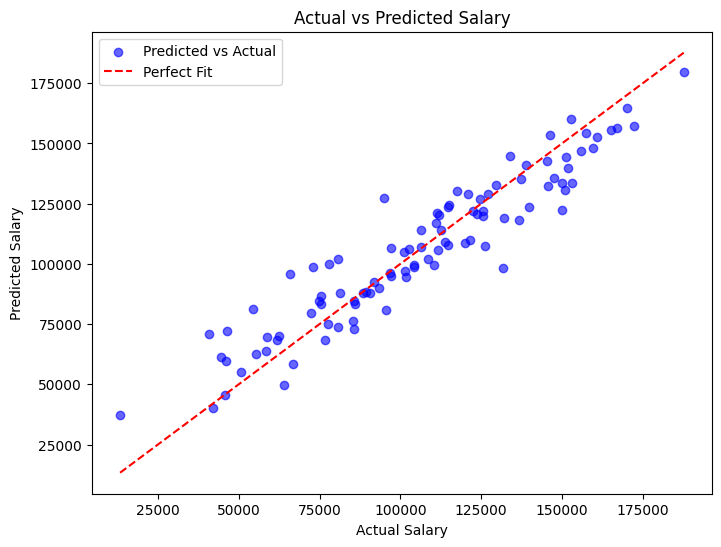

In [10]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
data = pd.DataFrame({
    'experience': np.random.randint(0, 20, 500),
    'education': np.random.randint(1, 4, 500),
    'industry': np.random.randint(1, 6, 500),
    'job': np.random.randint(1, 11, 500)
})

data['salary'] = (
    data['experience'] * 5000 +
    data['education'] * 10000 +
    data['industry'] * 7000 +
    data['job'] * 3000 +
    np.random.normal(0, 10000, 500)
)

# Split data
X = data[['experience', 'education', 'industry', 'job']]
y = data['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Output Accuracy + Graph Together
print(f"Model R² Score: {round(r2, 2)}")

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.legend()
plt.show()